<a href="https://colab.research.google.com/github/mansiraturi/FakeNewsDetection/blob/main/FakeNewsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
# import dask.dataframe as dd
# from dask.multiprocessing import get
from nltk.stem import WordNetLemmatizer


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# import matplotlib.pyplot as plt

# # Preprocessing Data
# import nltk
# from nltk.tokenize import word_tokenize
# from sklearn.metrics import roc_curve, auc
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
# from keras.preprocessing.text import one_hot

# #converting to vectors
# #from gensim.models import Word2Vec

# # Building Model
# # Deep Learning
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import (
#     Dense,
#     Embedding,
#     GlobalAveragePooling1D,
#     LSTM,
#     Bidirectional
# )
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score

# # model Validation
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report,
    roc_curve, 
    auc
)

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Embedding,
    GlobalAveragePooling1D,
    LSTM,
    Bidirectional
)


In [14]:
# df= pd.read_csv('/content/drive/MyDrive/preNews.csv', delimiter=",")
import os
project_root = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_root, "dataset")
df = pd.read_csv(os.path.join(dataset_path, "preNews.csv"), delimiter=",")
df.head()

,news,class
0,budget fight loom republican flip fiscal scrip...,1
1,militari accept transgend recruit monday penta...,1
2,senior republican senat let mueller job washin...,1
3,fbi russia probe help australian diplomat tipo...,1
4,trump want postal servic charg much amazon shi...,1


In [ ]:
corpus=[]

In [ ]:
for i in range(0, len(df)):
  rev = re.sub(r'[^a-zA-Z\s]', ' ', df['news'][i])
  rev =  rev.split()
  rev = ' '.join(rev)
  corpus.append(rev)

In [ ]:
print(corpus[:2])

['budget fight loom republican flip fiscal script washington reuter the head conserv republican faction congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican repres mark meadow speak face nation drew hard line feder spend lawmak brace battl januari when return holiday wednesday lawmak begin tri pas feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect the trump administr alreadi will say increas nondefens discretionari spend percent meadow chairman small influenti hous freedom caucu said program now democrat say enough need give govern pay rais percent for fiscal conserv see rational eventu run peopl money s

In [15]:
#divide into train and test set
X = df.drop("class", axis=1)
y = df["class"]

**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5500, ngram_range=(1,3))  #will take a combination of 1,2 or 3 words and count the frequency
x_cv = cv.fit_transform(corpus).toarray()

In [ ]:
x_cv.shape

(44838, 5500)

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[:20])


['abandon' 'abba' 'abc' 'abc new' 'abdullah' 'abe' 'abedin' 'abid' 'abil'
 'abl' 'abort' 'about' 'abroad' 'absenc' 'absolut' 'absurd' 'abu' 'abus'
 'academ' 'academi']


In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
xc_train, xc_test, yc_train, yc_test= train_test_split(x_cv, y, test_size=.25, stratify=y, random_state=42)

In [ ]:
count_df = pd.DataFrame(xc_train, columns = cv.get_feature_names_out())

In [ ]:
count_df.head()

,abandon,abba,abc,abc new,abdullah,abe,abedin,abid,abil,abl,...,your,youth,youtub,ypg,zealand,zero,zika,zimbabw,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# sorted(zip(classifier.coef_[0]))
# we need a model which trains x_cv and this classifier model is then sorted to get the features with most frequency

**TF-IDF Vectors**

In [24]:

# Extract features and labels as NumPy arrays
X = df['news'].values  # Convert to NumPy array
y = df['class'].values  # Convert to NumPy array

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Ensure y is correctly formatted as a 1D array
y = np.ravel(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, 
    y, 
    test_size=0.25, 
    random_state=42,
    stratify=y
)


In [30]:
# Print shapes to verify
import joblib
print("Full dataset shape:", X_tfidf.shape)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Optional: Save the vectorizer for later use
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

Full dataset shape: (44838, 5000)
Training set shape: (33628, 5000)
Testing set shape: (11210, 5000)


['tfidf_vectorizer.pkl']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=.25, stratify=y, random_state=42)

In [ ]:
len(y_train)

33628

In [ ]:
len(x_train)

33628

In [ ]:
#vectorizing x as raw data can't be used directly to perform calculations so we convert textual data to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
# Tfidf- term frequency/inverse document frequency: counts the frequency of a word in a file
xv_train = vectorization.fit_transform(x_train['news'])
xv_test = vectorization.transform(x_test['news'])


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MB = MultinomialNB()
MB.fit(xv_train, y_train)
pred_MB = MB.predict(xv_test)
MB_acc = MB.score(xv_test, y_test)

In [ ]:
print(pred_MB)

[0 1 1 ... 0 0 1]


In [ ]:
print(MB_acc)

0.9411239964317574


In [ ]:
print(classification_report(y_test, pred_MB))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5863
           1       0.94      0.94      0.94      5347

    accuracy                           0.94     11210
   macro avg       0.94      0.94      0.94     11210
weighted avg       0.94      0.94      0.94     11210



In [ ]:
X_df = X.copy()
y_df= y.copy()

In [ ]:
# from gensim.models import Word2Vec
# from nltk.tokenize import word_tokenize

# X_df['tokens'] = X_df['news'].apply(lambda x: word_tokenize(x))

# # Train Word2Vec model using Gensim
# word2vec_model = Word2Vec(sentences=X_df['tokens'], vector_size=100, window=5, min_count=3, workers=2, epochs=10)

# # Save the trained Word2Vec model if needed
# word2vec_model.save("word2vec_model.model")

# # Get word vectors using Gensim
# word_vectors_gensim = {word: word2vec_model.wv[word].tolist() for word in word2vec_model.wv.index_to_key}

# # Show word vectors using Gensim
# for word, vector in list(word_vectors_gensim.items())[:5]:
#     print(f'{word}: {vector}')


trump: [0.24943725764751434, 0.2871953547000885, -1.6766794919967651, 0.6568116545677185, -4.298946857452393, 2.9204444885253906, 1.3839951753616333, -2.8915774822235107, -0.14933724701404572, 0.9820129871368408, -1.0006996393203735, 1.2044992446899414, -0.7841105461120605, 1.8135277032852173, -2.8738322257995605, -3.143169641494751, 0.47507283091545105, 4.425313949584961, 1.0306642055511475, -0.526606559753418, 1.0593782663345337, 1.5716592073440552, -0.11411906033754349, 1.2844539880752563, -0.8665936589241028, 0.8779049515724182, 1.7362582683563232, 0.42940255999565125, -2.8078360557556152, -1.2084709405899048, 0.30791494250297546, -1.5127878189086914, 1.6082290410995483, -2.2414305210113525, -1.0446279048919678, -0.2785964012145996, 0.5218765735626221, -0.11956803500652313, 0.737395167350769, -0.7304701805114746, -0.5670835375785828, 1.2601877450942993, -1.4483599662780762, 1.2331312894821167, 0.9038975834846497, -0.26454755663871765, -0.7900117635726929, -1.3644351959228516, 0.704

In [ ]:
def agg_vectors(tokens, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

In [ ]:
X_df.head()

,news,tokens
0,budget fight loom republican flip fiscal scrip...,"[budget, fight, loom, republican, flip, fiscal..."
1,militari accept transgend recruit monday penta...,"[militari, accept, transgend, recruit, monday,..."
2,senior republican senat let mueller job washin...,"[senior, republican, senat, let, mueller, job,..."
3,fbi russia probe help australian diplomat tipo...,"[fbi, russia, probe, help, australian, diploma..."
4,trump want postal servic charg much amazon shi...,"[trump, want, postal, servic, charg, much, ama..."


In [ ]:
X_df['vector'] = X_df['tokens'].apply(lambda tokens: agg_vectors(tokens, word2vec_model))

# Prepare features for the Naive Bayes model
X_vec = pd.DataFrame(X_df['vector'].tolist(), index=X.index)


In [ ]:
#power tranformation
#X_vec = np.sqrt(X_vec.abs()) * np.sign(X_vec)

In [ ]:
X_vec[X_vec < 0] = 0

In [ ]:
y_df.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_df, test_size=0.25, random_state=42)

**Naive Bayes**

In [31]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_model.predict(X_test)

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9280107047279215


<Axes: >

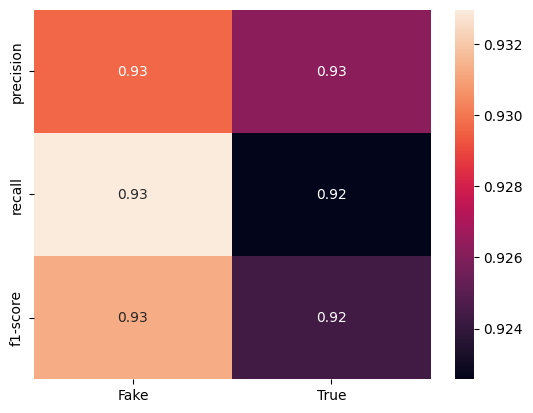

In [32]:
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, predictions, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5863
           1       0.93      0.92      0.92      5347

    accuracy                           0.93     11210
   macro avg       0.93      0.93      0.93     11210
weighted avg       0.93      0.93      0.93     11210



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Y=1/(1+e^(-z)) ; if prediction is greater than the threshold value-> classified as 1 or true news
#Z=w.x+b
#Y=prediction probability(determines whether label will be 0 or 1), x=input features
#w=weights (how important a feature is), b=biases(intercept)
LR=LogisticRegression()
LR.fit(X_train, y_train)
pred_LR = LR.predict(X_test)
LR_acc=LR.score(X_test, y_test)
LR_acc



0.9851917930419268

<Axes: >

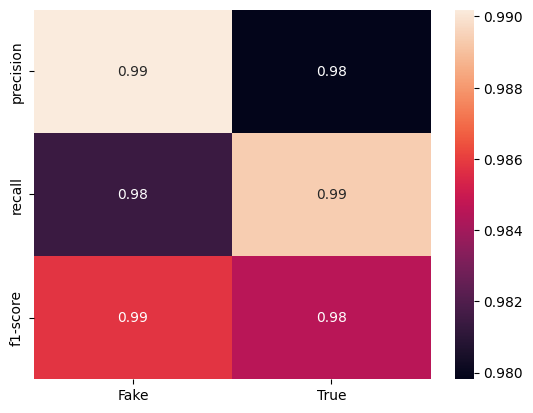

In [36]:
lr_clf_report = classification_report(y_test, pred_LR, target_names=['Fake', 'True'], output_dict=True)
lr_report={}
lr_report['Fake']=lr_clf_report['Fake']
lr_report['True']=lr_clf_report['True']
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1,:],annot=True)

In [37]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5863
           1       0.98      0.99      0.98      5347

    accuracy                           0.99     11210
   macro avg       0.99      0.99      0.99     11210
weighted avg       0.99      0.99      0.99     11210



**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()
DT_acc=DT.score(X_test, y_test)
pred_DT =  DT.predict(X_test)
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5863
           1       1.00      0.99      1.00      5347

    accuracy                           1.00     11210
   macro avg       1.00      1.00      1.00     11210
weighted avg       1.00      1.00      1.00     11210



In [42]:
cm = confusion_matrix(y_test, pred_DT)
print(cm)
# as3=accuracy_score(y_test, pred_DT)
# ps3=precision_score(y_test, pred_DT)
# r3=recall_score(y_test, pred_DT)
# f13=f1_score(y_test, pred_DT)
# print("Accuracy Score :",accuracy_score(y_test, pred_DT))
# print("Precision Score :",precision_score(y_test, pred_DT))
# print("Recall Score :",recall_score(y_test, pred_DT))
# print("f1 Score :",f1_score(y_test, pred_DT))


[[5841   22]
 [  31 5316]]


<Axes: >

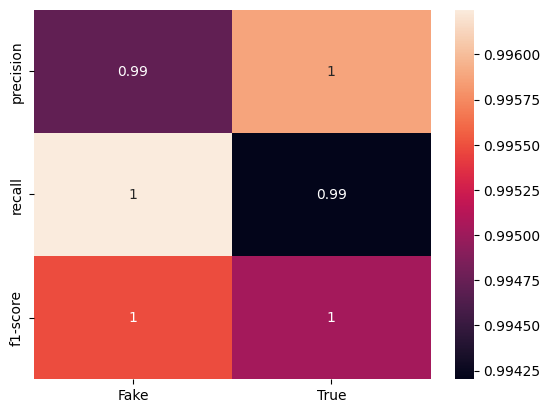

In [41]:
#Heat Map
clf_report = classification_report(y_test, pred_DT, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)

**Comparison**

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize results dictionary
results = {}

# Perform cross-validation and evaluation for each model
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training and evaluating {name}")
    
    # Stratified K-Fold cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        'CV Accuracy Mean': cv_scores.mean(),
        'CV Accuracy Std': cv_scores.std(),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Print detailed results
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'CV Accuracy': [results[model]['CV Accuracy Mean'] for model in models.keys()],
    'CV Std': [results[model]['CV Accuracy Std'] for model in models.keys()],
    'Test Accuracy': [results[model]['Test Accuracy'] for model in models.keys()]
}, index=models.keys())

# Display comparison
print("\nModel Comparison:")
print(comparison_df)




--------------------------------------------------
Training and evaluating Naive Bayes

Cross-validation scores: [0.92164734 0.92328278 0.92818912 0.92743494 0.92535316]
CV Accuracy: 0.9252 (+/- 0.0049)
Test Accuracy: 0.9280

Confusion Matrix:
[[5470  393]
 [ 414 4933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5863
           1       0.93      0.92      0.92      5347

    accuracy                           0.93     11210
   macro avg       0.93      0.93      0.93     11210
weighted avg       0.93      0.93      0.93     11210


--------------------------------------------------
Training and evaluating Logistic Regression

Cross-validation scores: [0.98349688 0.985281   0.98542968 0.98408922 0.98319703]
CV Accuracy: 0.9843 (+/- 0.0018)
Test Accuracy: 0.9852

Confusion Matrix:
[[5754  109]
 [  57 5290]]

Classification Report:
              precision    recall  f1-score   support

           0      

<Figure size 1000x600 with 0 Axes>

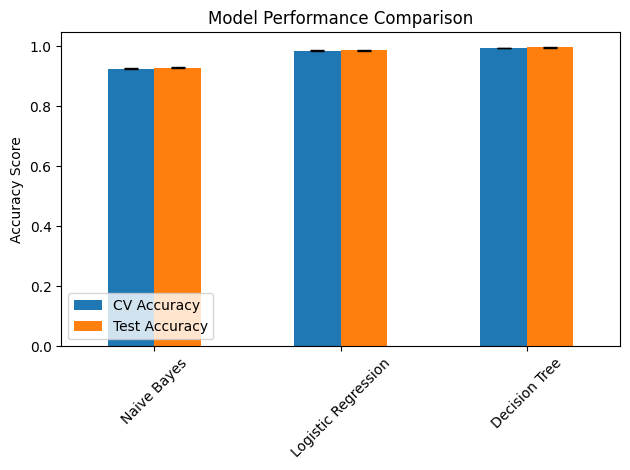

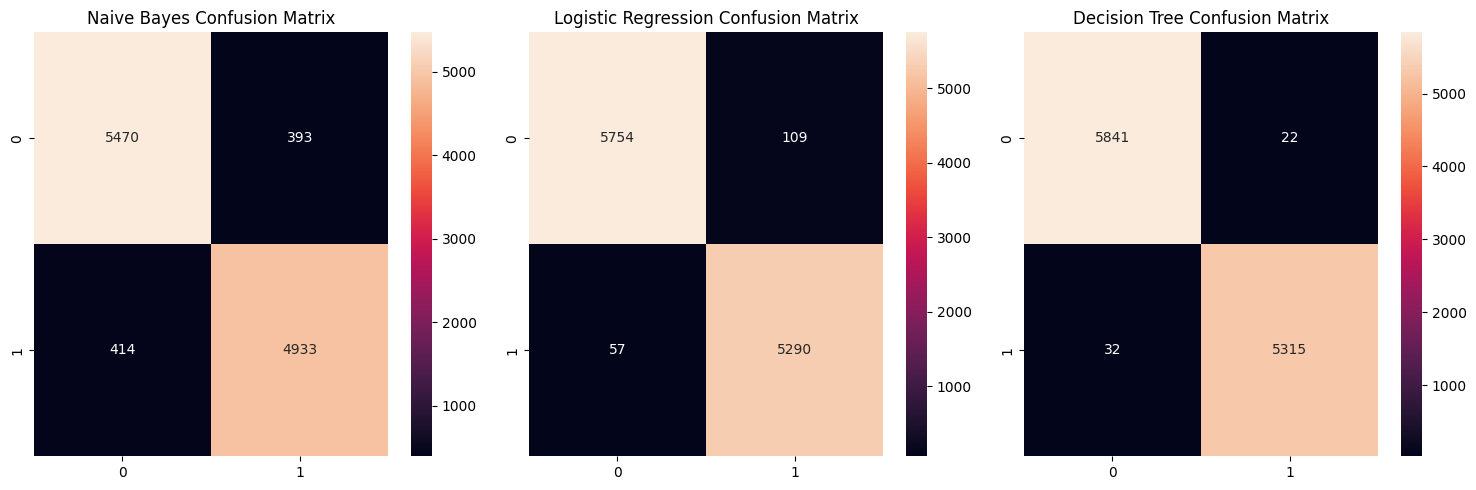

In [44]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
comparison_df[['CV Accuracy', 'Test Accuracy']].plot(kind='bar', yerr=comparison_df['CV Std'], capsize=5)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    sns.heatmap(results[name]['Confusion Matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

**LSTM**

In [50]:
#Parameters
MAX_FEATURES = 10000 
MAX_LEN = 100        # max length of each sequence
EMBEDDING_DIM = 100  # Dimension of embedding vectors
BATCH_SIZE = 64
EPOCHS = 10

# Initialize tokenizer
tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token="<OOV>")
tokenizer.fit_on_texts(X)  # X contains your 'news' texts

# Convert texts to sequences
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
X_padded = pad_sequences(
    X_sequences,
    maxlen=MAX_LEN,
    padding='post',
    truncating='post'
)

# Convert target to numpy array
y_array = np.array(y)

# Split the data
from sklearn.model_selection import train_test_split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_padded, 
    y_array,
    test_size=0.25,
    random_state=42,
    stratify=y_array
)

# Create validation split from training data
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_lstm,
    y_train_lstm,
    test_size=0.2,
    random_state=42,
    stratify=y_train_lstm
)

# Print shapes to verify
print("Training data shape:", X_train_lstm.shape)
print("Testing data shape:", X_test_lstm.shape)
print("Training labels shape:", y_train_lstm.shape)
print("Testing labels shape:", y_test_lstm.shape)

# Save tokenizer for later use (optional)
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


Training data shape: (26902, 100)
Testing data shape: (11210, 100)
Training labels shape: (26902,)
Testing labels shape: (11210,)


In [51]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

BATCH_SIZE = 64
EPOCHS = 10

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)


model = Sequential([
    Embedding(MAX_FEATURES, EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm_4 (LSTM)               (None, 100, 64)           42240     
                                                                 
 dropout_4 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

Epoch 1/10
421/421 [==============================] - 63s 138ms/step - loss: 0.3752 - accuracy: 0.8425 - val_loss: 0.3873 - val_accuracy: 0.8388
Epoch 2/10
421/421 [==============================] - 57s 135ms/step - loss: 0.3872 - accuracy: 0.8386 - val_loss: 0.3781 - val_accuracy: 0.8442
Epoch 3/10
421/421 [==============================] - 58s 137ms/step - loss: 0.3718 - accuracy: 0.8477 - val_loss: 0.3522 - val_accuracy: 0.8604
Epoch 4/10
421/421 [==============================] - 61s 145ms/step - loss: 0.2849 - accuracy: 0.8897 - val_loss: 0.1222 - val_accuracy: 0.9682
Epoch 5/10
421/421 [==============================] - 60s 143ms/step - loss: 0.0932 - accuracy: 0.9795 - val_loss: 0.0781 - val_accuracy: 0.9833
Epoch 6/10
421/421 [==============================] - 59s 141ms/step - loss: 0.1117 - accuracy: 0.9713 - val_loss: 0.1697 - val_accuracy: 0.9514
Epoch 7/10
421/421 [==============================] - 65s 153ms/step - loss: 0.1523 - accuracy: 0.9525 - val_loss: 0.1184 - val_ac

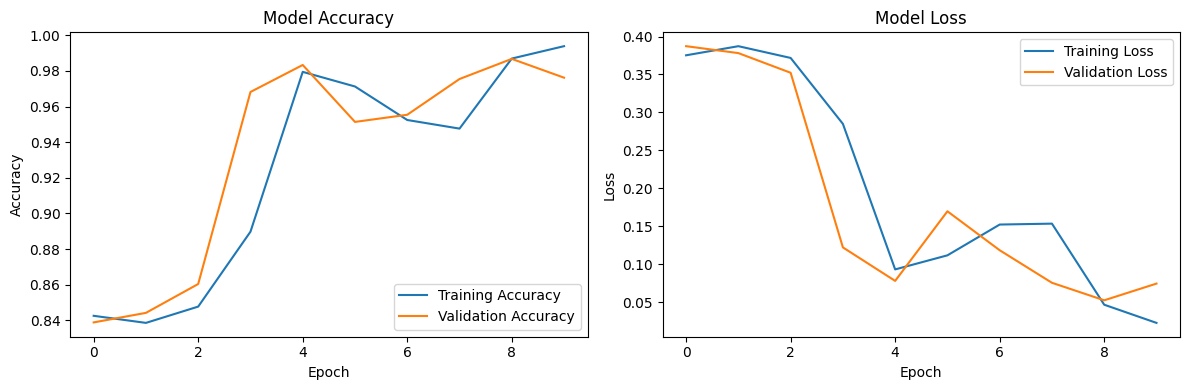

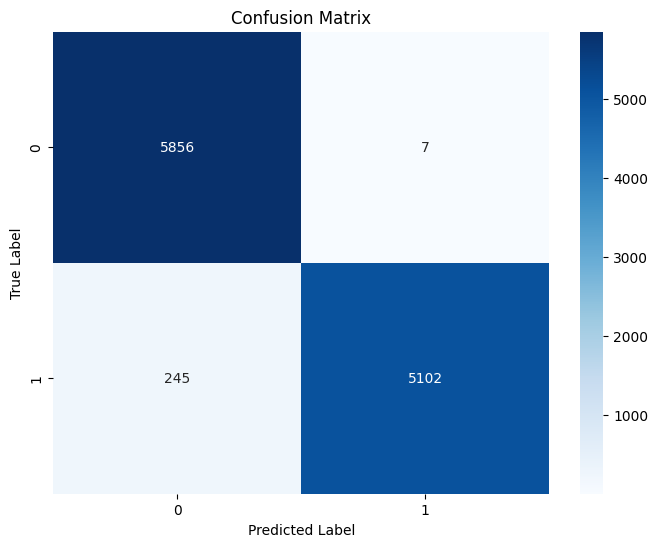

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Train model
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_lstm = model.predict(X_test_lstm)
y_pred_classes = (y_pred_lstm > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test_lstm, y_pred_classes))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_lstm, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()